# Linear Regression Models
### Predict Insurance Charges using different Linear Regression Models and compare results.


Linear Regression is a supervised machine learning algorithm used for predicting a numerical dependent variable based on one or more features (independent variables). In the case of insurance, the target variable is the insurance premium (charge), and the features could be age, gender, BMI, and so on.




**Exploratory Data Analysis (EDA) of Insurance Data**

We will work with the insurance data which can be found on this link: https://github.com/eajitesh/insurance-linear-regression-example/blob/main/insurance.csv  

The dataset contains the following columns:

*   age: Age of the insured
*   sex: Gender of the insured
*   bmi: Body Mass Index
*   children: Number of dependents/children
*   smoker: Smoking status
*   region: Geographical region
*   charges: Insurance premium charges

First we will load all the libraries that we will need, and load the dataset.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
#To upload the data to the notebook, it must be obtained from the following link:
#https://github.com/eajitesh/insurance-linear-regression-example/blob/main/insurance.csv

df = pd.read_csv("insurance.csv")


In [8]:
# show the first 10 lines od the dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [12]:
# Information about dataset dimension

df.shape

(1338, 7)

##**Exploratory Data Analysis (EDA)**

Is an essential step to understand the data before building any machine learning model. We will look into the following commonly explored aspects:


1.   Descriptive Statistics
2.   Data Types and Missing Values
3.   Univariate Analysis (Distribution of individual features)
4.   Bivariate Analysis (Correlation between features and target variable)




**Descriptive statistics**

Let’s start with the descriptive statistics to get an overview of the numerical columns in the dataset.

In [13]:
# Generate descriptive statistics of the numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values.

In [14]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
age,int64,0,47
sex,object,0,2
bmi,float64,0,548
children,int64,0,6
smoker,object,0,2
region,object,0,4
charges,float64,0,1337


**Univariate analysis**

Visualizing the distribution of the numerical variables (age, bmi, children, and charges) and then take a look at the categorical variables (sex, smoker, and region).

Plot histograms for age, bmi, children and charges to understand their distributions.

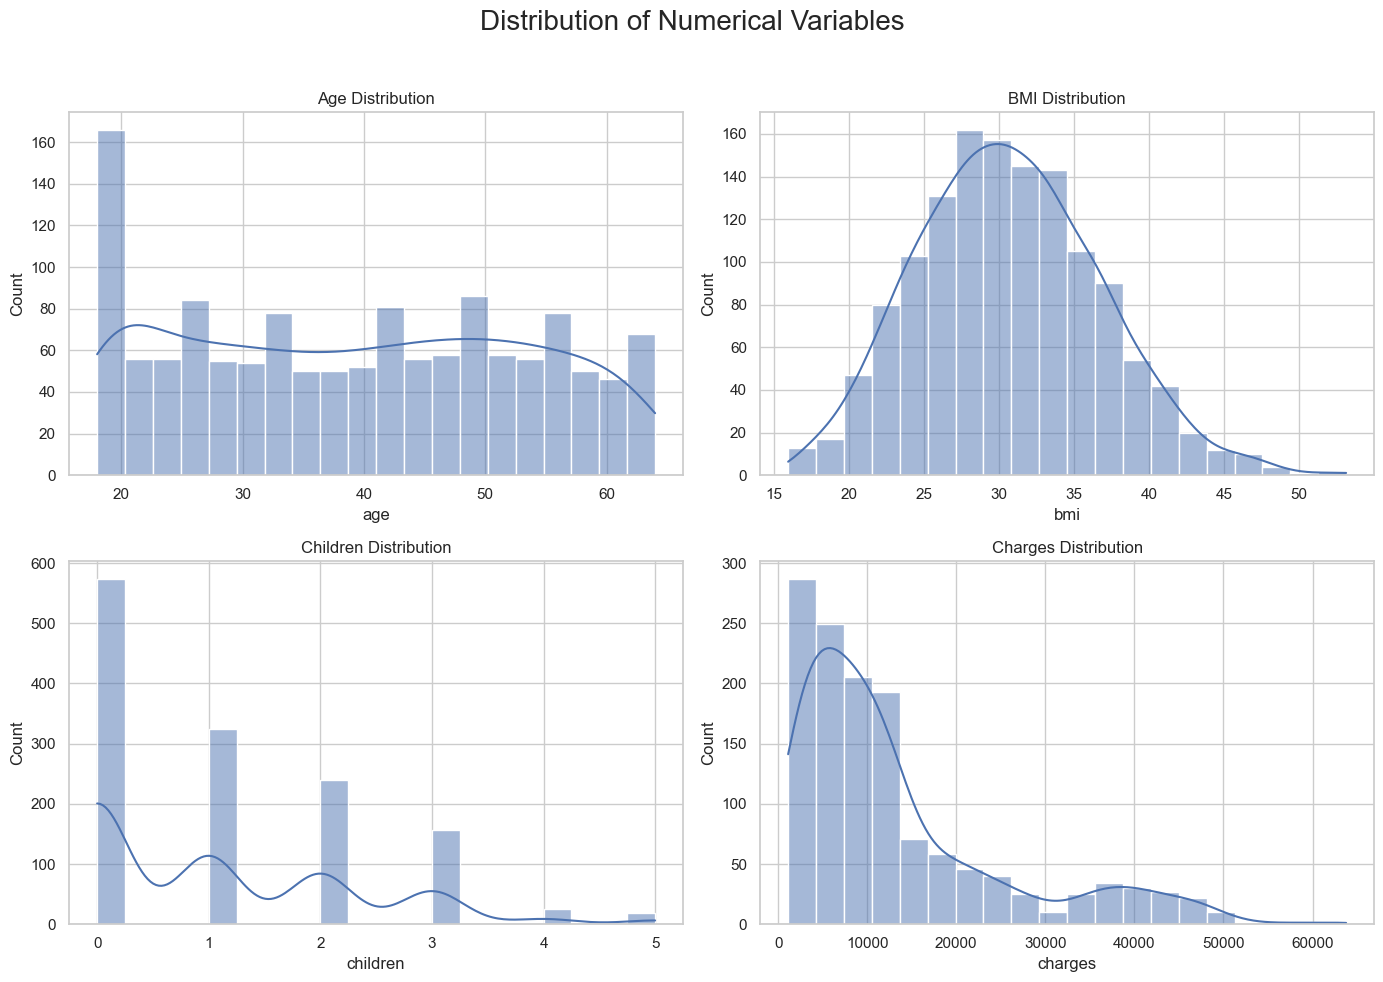

In [15]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# Plot histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables')

sns.histplot(df['age'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['bmi'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(df['children'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(df['charges'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 Distribution of the categorical variables (sex, smoker, and region) using bar plots.

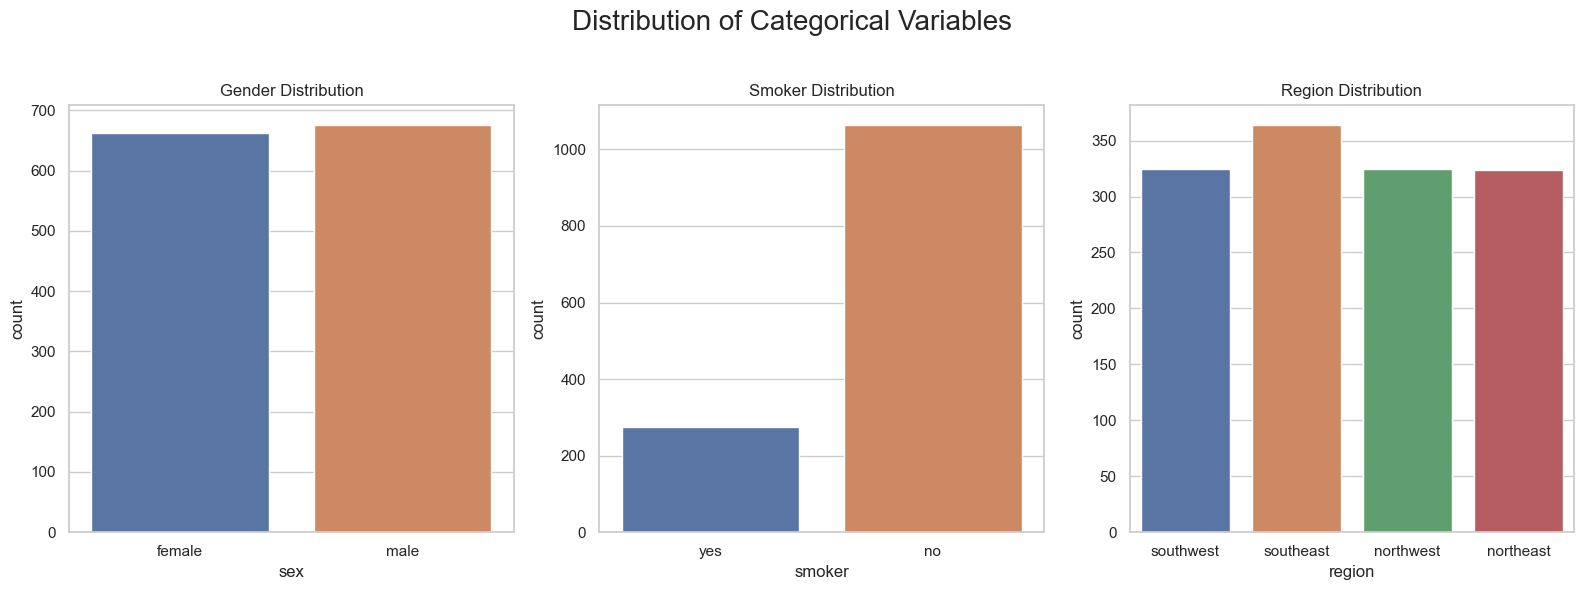

In [16]:
# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(x='smoker', data=df, ax=axes[1])
axes[1].set_title('Smoker Distribution')

sns.countplot(x='region', data=df, ax=axes[2])
axes[2].set_title('Region Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**What relevant information can you extract from the graphs obtained in the Univariate Analysis?**

**Bivariate Analysis**


In the bivariate analysis, we need to understand the relationship between the individual features and the target variable, charges.

We could start by plotting scatter plots between the numerical variables (age, bmi, children) and charges to observe any trends or patterns.

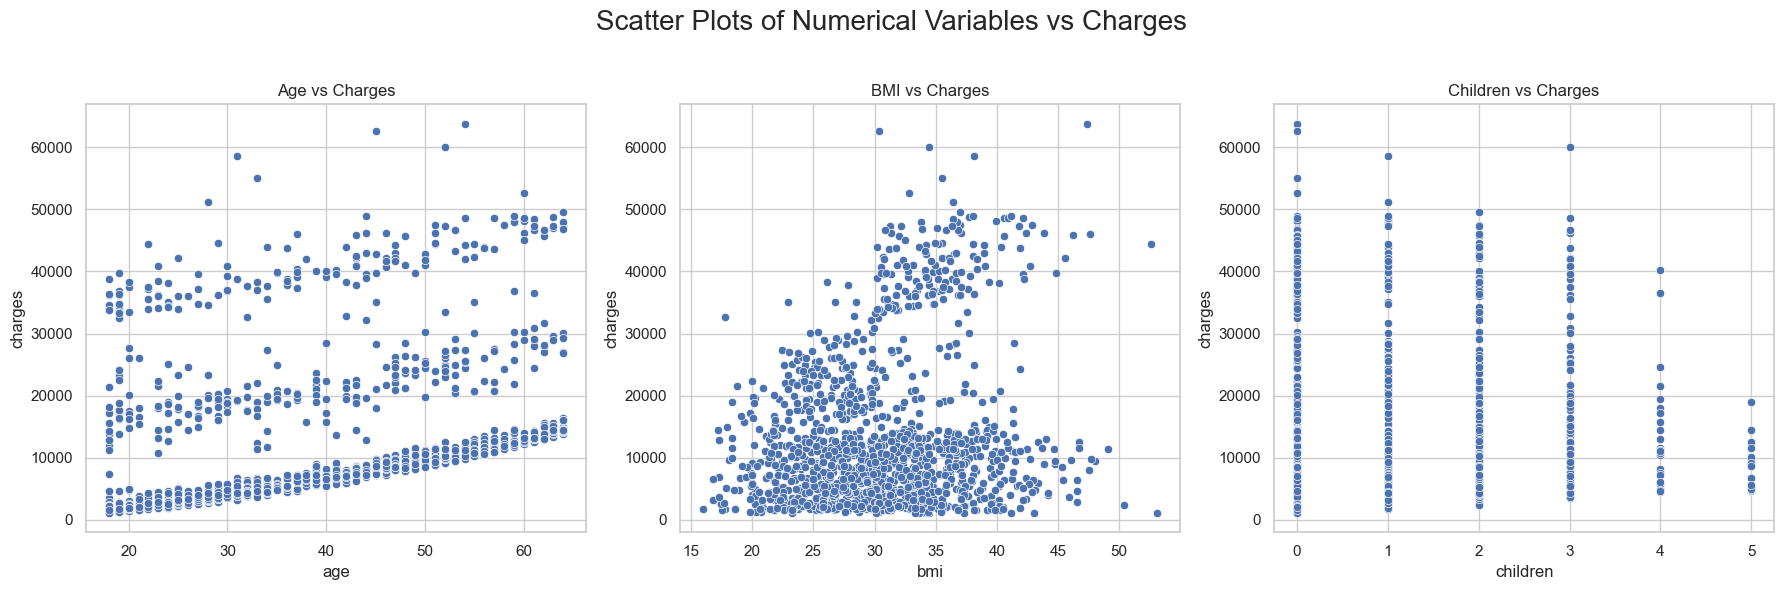

In [17]:
# Plot scatter plots for numerical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Scatter Plots of Numerical Variables vs Charges')

sns.scatterplot(x='age', y='charges', data=df, ax=axes[0])
axes[0].set_title('Age vs Charges')

sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1])
axes[1].set_title('BMI vs Charges')

sns.scatterplot(x='children', y='charges', data=df, ax=axes[2])
axes[2].set_title('Children vs Charges')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Here are some observations from the scatter plots:

**Age vs Charges**: There seems to be a positive correlation between age and insurance charges, indicating that older individuals are likely to be charged higher premiums.

**BMI vs Charges**: There is a general trend showing higher charges for individuals with higher BMI, although the relationship is not as clear-cut.

**Children vs Charges**: The relationship between the number of children and charges is not very clear from the scatter plot. Charges appear to be distributed across the range for different numbers of children.

Compare the categorical variables (sex, smoker and region) with the insurance charges. We could use box plots for this analysis.

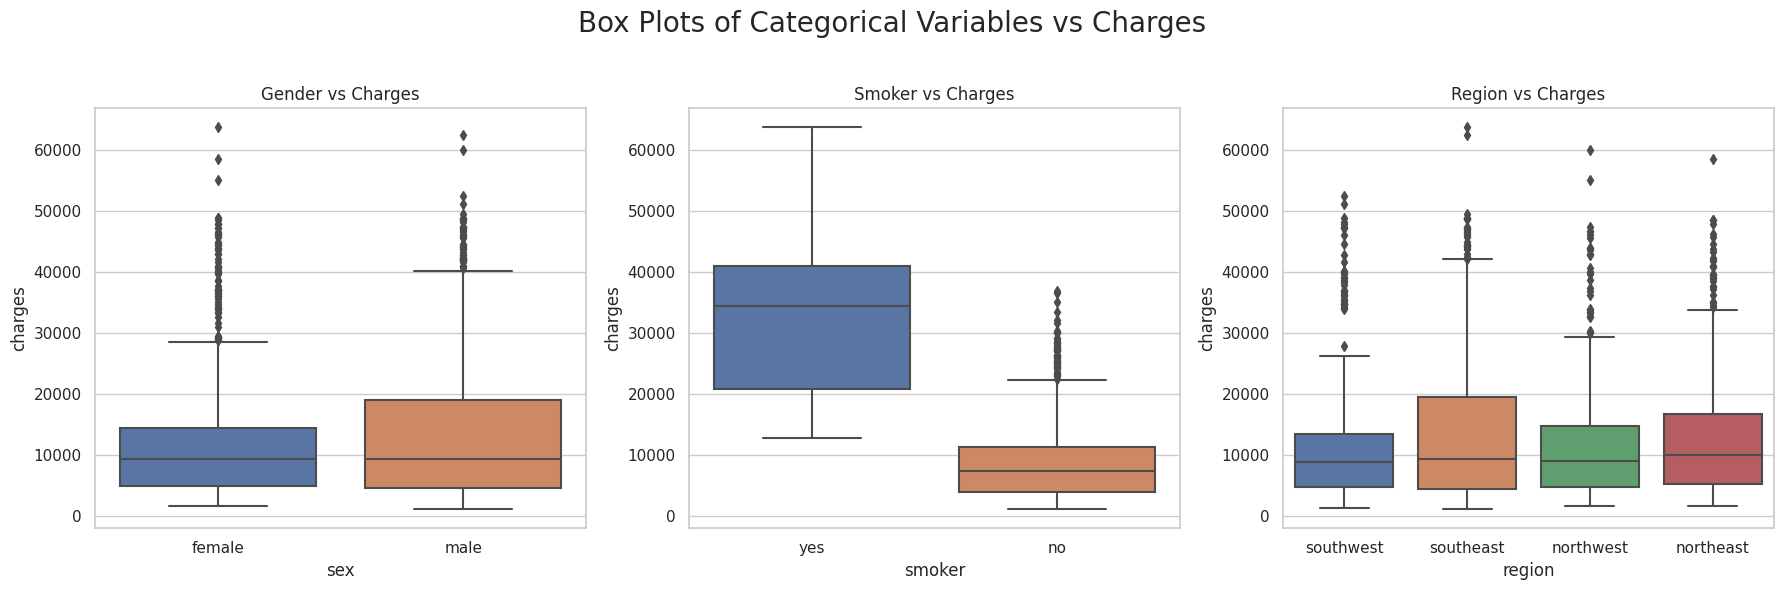

In [10]:
# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots of Categorical Variables vs Charges')

sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
axes[0].set_title('Gender vs Charges')

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1])
axes[1].set_title('Smoker vs Charges')

sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Region vs Charges')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**The box plots reveal the following insights:**

**Gender vs Charges**: The median insurance charges are quite similar for both genders, although males seem to have a slightly higher range of charges.

**Smoker vs Charges**: There’s a significant difference in charges between smokers and non-smokers, with smokers generally facing much higher premiums.

**Region vs Charges**: The charges appear to be distributed fairly similarly across different regions, with no substantial differences.

##**Simple Linear Regression**

We will start by develop a Simple Linear Regression, where there is only one input variable and one output variable.

Equation: y = ax+b

a = slope
b = intercept
x = input
y = output

Let's use age as an input variable and charges as output.

In [18]:
x=df[['age']]
y=df[['charges']]
lr = LinearRegression()
lr_model = lr.fit(x, y)

predictions = lr_model.predict(x)
df['slr_result'] = predictions

slr_error = y - predictions
df['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

Slope:  [[257.72261867]]
Intercept:  [3165.88500606]
Mean absolute error: 9055.15
Residual sum of squares (MSE): 133440978.61
R2-score: 0.09


What you think about the results?

You can use other input variables to see if the results improve.

Do you think the linear regression method is an appropriate algorithm for the characteristics of this dataset?

**Visualize Predictions Of Simple Linear Regression**

C:\Users\Stepa\AppData\Local\Temp\ipykernel_19636\3387251796.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
C:\Users\Stepa\AppData\Local\Temp\ipykernel_19636\3387251796.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

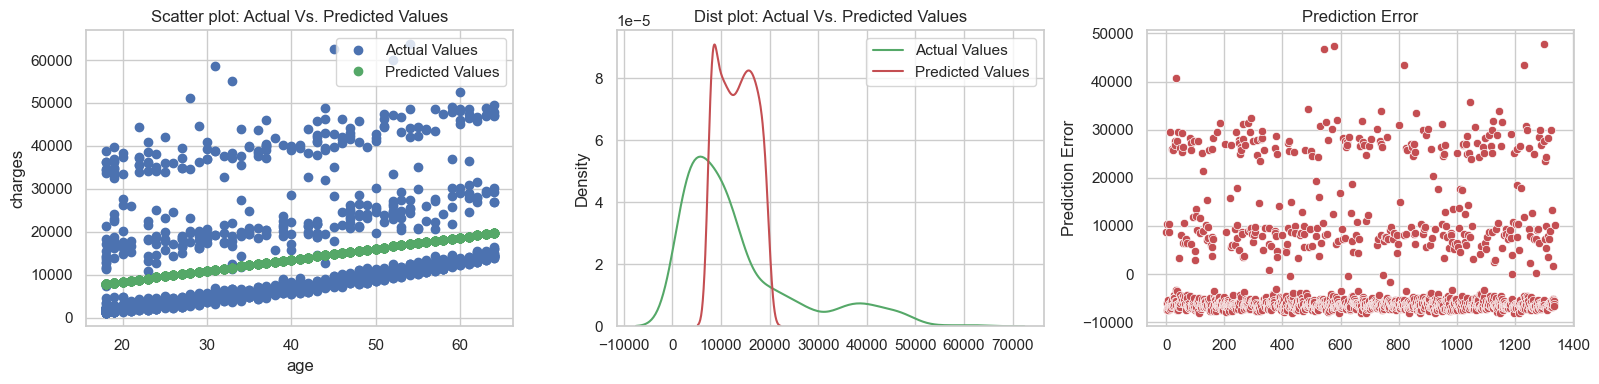

In [19]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x['age'], y,'bo',label='Actual Values')
axes[0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=y.index,y='slr_error',data=df,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

##**Challenges:**



*   **Apply a Multiple Linear Regression Model in the dataset.**

In multiple linear regression there can be multiple inputs and single output.

Equation: $y = a_1x_1 + a_2x_2 + b$

$a_1,a_2$ = slope

b = intercept

$x_1,x_2$ = input

y = output

*   **Test different sets of input variables in order to optimize the model's performance.**


*   **What other type of regression could be used to improve the model's performance?**


In [23]:
# Do the LR for Age and BMI => Charges
x1=df[['age']]
x2=df[['bmi']]
X = pd.concat([x1, x2], axis=1)
y=df[['charges']]
lr = LinearRegression()
lr_model = lr.fit(X, y)

predictions = lr_model.predict(X)
df['slr_result'] = predictions

slr_error = y - predictions
df['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

Slope:  [[241.9307779  332.96509081]]
Intercept:  [-6424.80461224]
Mean absolute error: 9032.48
Residual sum of squares (MSE): 129370388.91
R2-score: 0.12


In [35]:
# Do the LR for Age and BMI => Charges
x1=df[['age']]
x2=df[['bmi']]
x3=df[['smoker']]
X = pd.concat([x1, x2, x3], axis=1)
X['smoker'] = X['smoker'].map({'yes':True, 'no':False})
y=df[['charges']]
lr = LinearRegression()
lr_model = lr.fit(X, y)

predictions = lr_model.predict(X)
df['slr_result'] = predictions

slr_error = y - predictions
df['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

Slope:  [[  259.54749155   322.61513282 23823.68449531]]
Intercept:  [-11676.83042519]
Mean absolute error: 4216.78
Residual sum of squares (MSE): 37005395.75
R2-score: 0.75
